In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

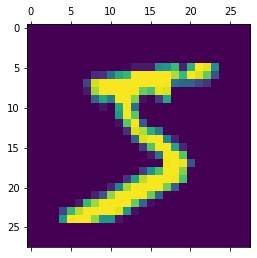

In [8]:
plt.matshow(X_train[0])

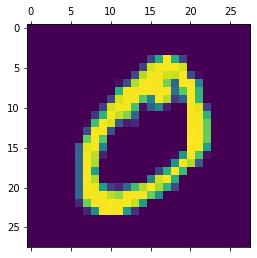

In [9]:
plt.matshow(X_train[1])

In [10]:
y_train[0]

5

In [11]:
y_train[1]

0

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
X_train.shape

(60000, 28, 28)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [25]:
X_test_flattened.shape

(10000, 784)

In [26]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
 model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
    
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             
             
 )

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4909 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3063 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2859 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2748 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2679 - accuracy: 0.9263


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2676 - accuracy: 0.9242: 0s - loss: 0.2857 


[0.267645925283432, 0.9241999983787537]

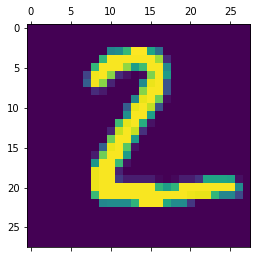

In [37]:
plt.matshow(X_test[1])

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([1.5079975e-04, 8.5808057e-07, 4.7171485e-01, 1.8891692e-04,
       1.4847856e-13, 2.5205910e-03, 2.2167861e-03, 2.7064436e-16,
       3.8995015e-05, 3.8037162e-13], dtype=float32)

In [39]:
np.argmax(y_predicted[1])

2

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    8,  933,   16,    9,    6,   11,    8,   33,    4],
       [   2,    0,   19,  924,    1,   30,    2,   11,   14,    7],
       [   1,    1,    4,    1,  921,    0,    9,    4,    6,   35],
       [   7,    1,    5,   31,    9,  795,   11,    5,   23,    5],
       [  10,    3,    9,    1,    8,   20,  902,    2,    3,    0],
       [   1,    7,   25,    7,    8,    0,    0,  948,    1,   31],
       [   6,    8,    7,   31,   10,   44,    9,   13,  839,    7],
       [  10,    7,    1,   12,   30,   10,    0,   31,    2,  906]])>

Text(69.0, 0.5, 'Truth')

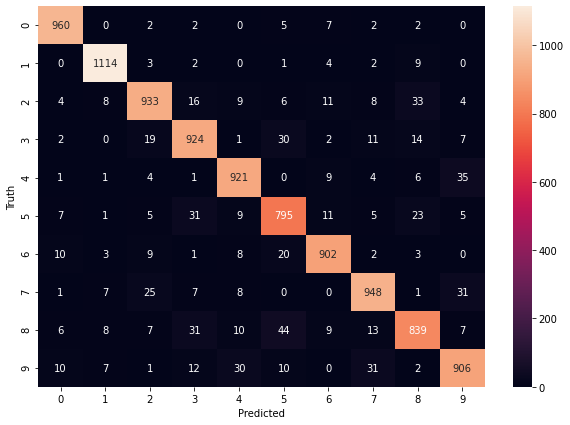

In [47]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### with hidden layer

In [48]:
 model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid') 
])
    
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             
             
 )

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2891 - accuracy: 0.9192
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1335 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0960 - accuracy: 0.9708
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0738 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0591 - accuracy: 0.9824


In [49]:
 model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0954 - accuracy: 0.9697


[0.09542544186115265, 0.9696999788284302]

Text(69.0, 0.5, 'Truth')

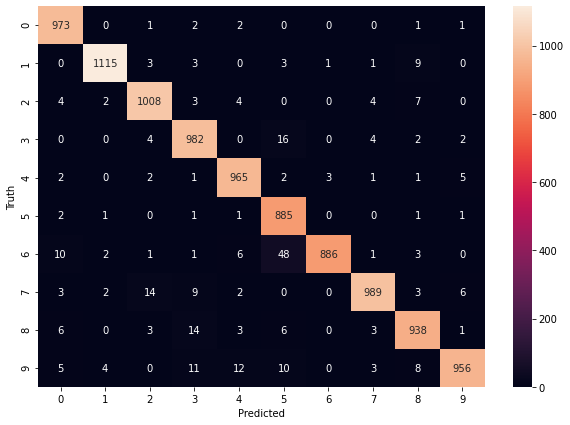

In [58]:
y_predicted= model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### using inbulit flatten fuction in keras

In [60]:
 model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid') 
])
    
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             
             
 )

model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2941 - accuracy: 0.9162
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1383 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0997 - accuracy: 0.97061s - loss: 0.0992  - ETA: 1s - loss: 0.0
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0785 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0630 - accuracy: 0.9812
